# Data Peprocessing

## Missing Values

In [11]:
from sklearn import datasets
from amltlearn.preprocessing import Discretizer
from pylab import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We obtain a corrupted copy of the iris dataset by adding some missing values (exactly 75 missing values distributed on the four dimensions)

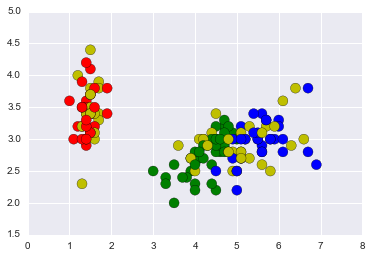

In [12]:
from sklearn.preprocessing import Imputer
from numpy.random import randint
iris = datasets.load_iris()
dimX, dimY = iris['data'].shape
lrandX = randint(dimX, size=75)
lrandY = randint(dimY, size=75)

lcols = [['r','g','b'][i]  for i in iris['target']]
for i in lrandX:
    lcols[i] = 'y'


plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=lcols,s=100)

The graphic shows the original data marking in yellow the examples that are going to be corrupted.

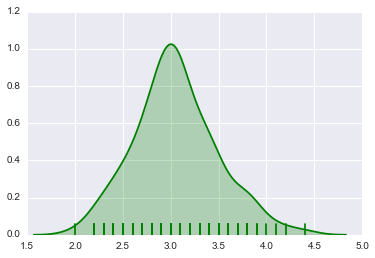

In [14]:
sns.distplot(iris['data'][:,1], hist=False, rug=True, color="g", kde_kws={"shade": True})
plt.show()

This is a kernel density estimatio of the distribution of the values for dimension 1 for the original data (no missing values)

Now we corrupt the data an we apply a missing values imputer algorithm to complete the data, in this case we substitute the missings using the mean of the attibute.

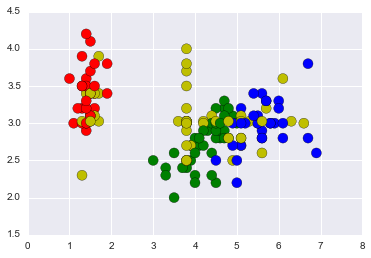

In [15]:
for x,y in zip(lrandX,lrandY):
    iris['data'][x,y]=float('NaN')
imp = Imputer(missing_values='NaN', strategy='mean')
imp_iris = imp.fit_transform(iris['data'])
plt.scatter(imp_iris[:, 2], imp_iris[:, 1], c=lcols,s=100)

As we can see, all the examples with missing values for the dimensions 1 and 2 appear aligned on the mean of the attributes. It can be seen that the distribution of the dimension 1 has changed, the variance has been reduced.

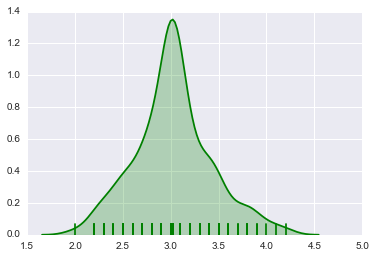

In [16]:
sns.distplot(imp_iris[:,1], hist=False, rug=True, color="g", kde_kws={"shade": True})
plt.show()

Now we use the most frequent value of the attribute to impute the missing values

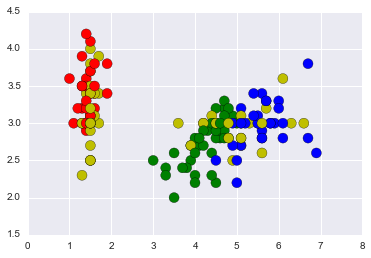

In [17]:
imp = Imputer(missing_values='NaN', strategy='most_frequent')
imp_iris = imp.fit_transform(iris['data'])
plt.scatter(imp_iris[:, 2], imp_iris[:, 1], c=lcols,s=100)

As expected, the imputed examples now appear aligned on the most frequent value and the variance is also reduced

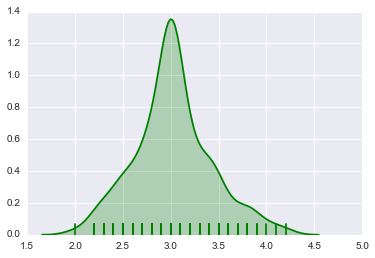

In [18]:
sns.distplot(imp_iris[:,1], hist=False, rug=True, color="g", kde_kws={"shade": True})
plt.show()

Now we are going to use  the euclidean distance to determine the closest examples and to use the mean of the values of the 3-nearest neighbor to substitute the missing value

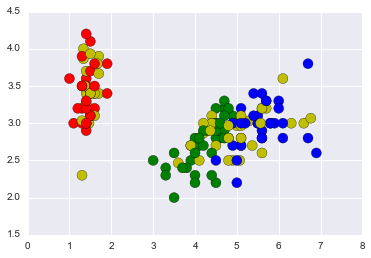

In [23]:
from amltlearn.preprocessing import KnnImputer
knnimp = KnnImputer(missing_values='NaN', n_neighbors=3)
imp_iris = knnimp.fit_transform(iris['data'])

plt.scatter(imp_iris[:, 2], imp_iris[:, 1], c=lcols,s=100)

As we can see the examples look more naturally distributed and now the distribution of the attributes looks more similar to the original one.

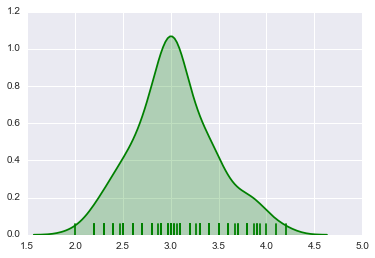

In [24]:
sns.distplot(imp_iris[:,1], hist=False, rug=True, color="g", kde_kws={"shade": True})
plt.show()